<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/YoloCustomObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLO OBJECT DETECTION

## Description:
1.The  below python notebook is implementation of  YOLO Object detection

2.Around 3500 annotated images of Class = 'Mask', 'Boot', 'Hardhat', 'Vest' are used for the training.

3.This below implementation is multi  class prediction 

4.For inferencing a you tube video is converted into images using ffmpeg and fed to the trained yolo model.

5.After the yolo model detected classes in the input images(generated out of the youtube video) fed,The output images,with the predicted is again converted back to video using ffmpeg



In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1:Git Clone Yolo V3 to the Google Colab
(Don't forget to put 'yolov3-spp-ultralytics.pt' file in the weights folder of YoloV3)

## Step2 :Install  ffmpeg for converting Video to image and image to video conversion

In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## Step 4: Change the directory to YoloV3

In [ ]:
! mkdir wd

In [ ]:
! cp '/content/drive/My Drive/YoloV3-OD.zip' wd

In [ ]:
!ls -l wd

total 517788
-rw------- 1 root root 530208759 Jul 30 15:37 YoloV3-OD.zip


In [ ]:
! unzip wd/YoloV3-OD.zip

Streaming output truncated to the last 5000 lines.
  inflating: YoloV3-OD/data/customdata/images/LImage_058.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_059.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_060.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_061.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_062.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_063.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_064.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_065.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_066.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_067.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_068.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_069.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_070.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_071.jpg  
  inflating: YoloV3-OD/data/customdata/images/LImage_072.jpg  
  in

In [ ]:
! ls YoloV3-OD/data

cfg  coco.names  customdata  samples  smalcoco


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

drive  sample_data  wd	YoloV3-OD


## Step 5:Import the necessary Pytorch and OS and Image utililites

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


##Step 6:For testing if YoloV3 setup is fine,first train a small coco data set of 20 images.
Ths coco data set is available in the YoloV3 which is gitcloned in step 1

(Note:The 20 images are annotated and the annotated images labels are placed in the labels directory.)

In [ ]:
% cd YoloV3-OD
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


/content/YoloV3-OD
Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-27 08:08:16.802669: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 3224.90it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 112.15it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 

#Step 7: Now train YoloV3 for custom data.
The custom data in this case is 3500 Masked images placed in the 'images' directory.The images are annotated and the corresponding labels are placed in the 'labels; directory

These 3500 images are trained for 300 Epochs

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg data/cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='data/cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-07-27 08:08:44.284003: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3263 found, 145 missing, 45 empty, 0 duplicate, for 3453 images): 100% 3453/3453 [00:00<00:00, 7551.58it/s]
Caching images (1.9GB): 100% 3453/3453 [00:21<00:00, 162.94it/s]
Reading image shapes: 100% 318/318 [00:00<00:00, 5585.89it/s]
Caching lab

In [ ]:
!ls 

 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     vim.exe.stackdump
 detect.py	   results.json   ting		     weights
 models.py	   results.png	  train_batch0.png
 out_out	   results.txt	  train.py


In [ ]:
! ls weights

download_weights.sh  last.pt  yolov3-spp-ultralytics.pt


In [ ]:
!pwd

/content/YoloV3-OD


In [ ]:
!cp /content/YoloV3-OD/weights/* "/content/drive/My Drive/eva6_yolo"

## Step 8:The trained Yolo model is now used to detect the Mask in the images.

The input images fed to the trained model is nothing but these 3500 images.

The ouput(Images with Masked output is stored in the out_out directory under 'YoloV3' directory)


In [ ]:
% cd YoloV3-OD

/content/YoloV3-OD


In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/3693 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 3 bootss, Done. (0.019s)
image 2/3693 d

## Step 9:Display few of the predicted images stored in out_out

In [ ]:
!ls out_out

'01-prince-boots - Copy.jpg'
 026f0ffddc.jpg
 032620_LS_covid-masks_inline-680.jpg
 046acbc8e1.jpg
'050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg'
 051fa0f9fd.jpg
'05a207d8-6378-43a2-9d1e-431ca7a944e4-unnamed - Copy.jpg'
 088b63b347a4e40f0777df612ebe490a.jpg
 0983a70ffe.jpg
 0b59d3bd16.jpg
 101.jpg
 102.jpg
 103.jpg
 104.jpg
 105.jpg
 106.jpg
 107.jpg
 10e3431da9.jpg
 10.jpg
 110.jpg
 1110f7133f.jpg
 1119a27d1c.jpg
 _112919912_gettyimages-1220030093.jpg
 1138b4f228.jpg
 114.jpg
 115fea1f20.jpg
 115.jpg
 117.jpg
 118.jpg
 119.jpg
 11.jpg
 12072638_10153880495409206_7613588994409949885_n.jpg
 120.jpg
 122.jpg
 123.jpg
 12532006-3x4-xlarge.jpg
 125.jpg
 126.jpg
 127.jpg
 128.jpg
 129.jpg
 12.jpg
 131.jpg
 13.jpg
 148757020-female-engineer-wear-face-mask-with-safety-vest-and-yellow-helmet-operating-control-cnc-machinery-at.jpg
 148789689-group-people-worker-is-wearing-protection-mask-face-and-safety-helmet-and-wearing-suit-safety-dress-.jpg
 14.jpg
 150px-Den

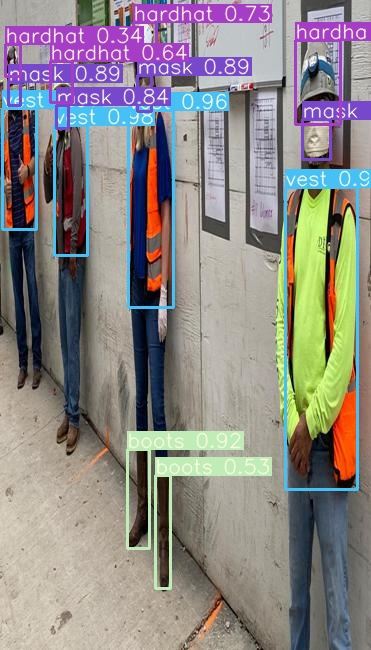

In [ ]:
Image(filename='out_out/1.jpg', width=600)

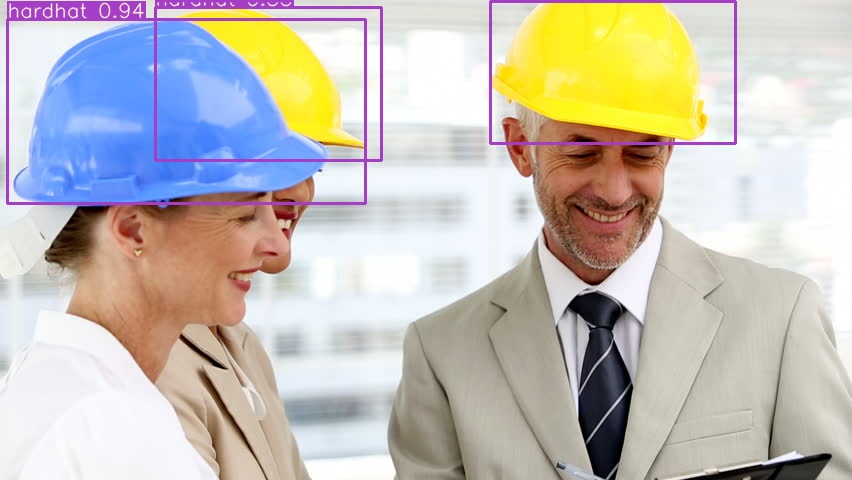

In [ ]:
Image(filename='out_out/2.jpg', width=600)

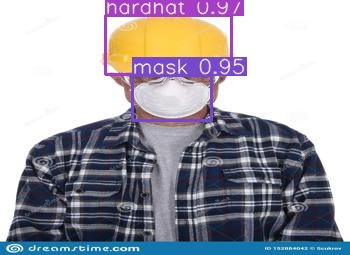

In [ ]:
Image(filename='out_out/3.jpg', width=600)

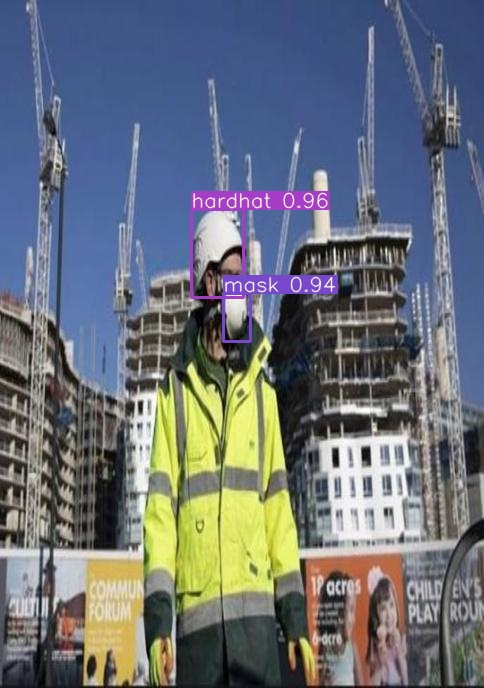

In [ ]:
Image(filename='out_out/4.jpg', width=600)

## Step 10:Upload few videos of having persons in Mask

In [ ]:
!ls '/content/drive/My Drive/'

 0_x.npy
 100_x.npy
 100_y.npy
 1_x.npy
 2_x.npy
 3_x.npy
 ACD_BDD2.3_Session_4_Main.pdf
 ACD_MDS_V2_Session_10_LDT.pdf
 ACD_MDS_V2_Session_12_LDT.pdf
 ACD_MDS_V2_Session_9_LDT.pdf
'afq-stze-smj - Jul 14, 2021.gjam'
'Apt_Floor plans.rar'
 assignment14_grid_search_best_model.h5
 assignment15.ipynb
 assignment1_monimoy_deb_purkayastha_16_16.zip
 assignment2_monimoy_deb_purkayastha.zip
 assignment3_monimoy_deb_purkayastha.zip
 assignment5_best_model.h5
 assignment_5_resnet_cifar10.h5
 aug_auto.npy
 aug_cutout.npy
'bandicam 2020-05-07 23-14-20-936.mp4'
 bert_course_final.docx
 BERT_lab.ipynb
 butter.jpg
 certificates
 ChaitaliLatestProject.zip
 ChaitaliProject.zip
 character_prediction.h5
 cifar10_assignment11_2_best_model.h5
 cifar10_assignment11_best_model.h5
 cifar10_assignment6a_best_model.h5
 cifar10_assignment6a_v2_best_model.h5
 cifar10_assignment6a_v3_best_model.h5
 cifar10_assignment6b_best_model.h5
 cifar10_resnet18_cyclic_0.1.pth
 cifar10_resnet18_cyclic_0.2.pth
 cifar10_resnet1

In [ ]:
! ls "/content/drive/My Drive/YoloV3/data/customdata/Vedios/object_detection.mp4"

'/content/drive/My Drive/YoloV3/data/customdata/Vedios/object_detection.mp4'


## Step 11:Convert the Videos into images using ffmpeg

In [ ]:
! mkdir -p data/customdata/Vedios/imagespub

In [ ]:
!ffmpeg -i "/content/drive/My Drive/YoloV3/data/customdata/Vedios/object_detection.mp4" data/customdata/Vedios/imagespub/image-%03d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
!ls 'data/customdata/Vedios/imagespub'

image-001.jpg	image-1204.jpg	image-1498.jpg	image-356.jpg  image-679.jpg
image-002.jpg	image-1205.jpg	image-1499.jpg	image-357.jpg  image-680.jpg
image-003.jpg	image-1206.jpg	image-149.jpg	image-358.jpg  image-681.jpg
image-004.jpg	image-1207.jpg	image-1500.jpg	image-359.jpg  image-682.jpg
image-005.jpg	image-1208.jpg	image-1501.jpg	image-360.jpg  image-683.jpg
image-006.jpg	image-1209.jpg	image-1502.jpg	image-361.jpg  image-684.jpg
image-007.jpg	image-120.jpg	image-1503.jpg	image-362.jpg  image-685.jpg
image-008.jpg	image-1210.jpg	image-1504.jpg	image-363.jpg  image-686.jpg
image-009.jpg	image-1211.jpg	image-1505.jpg	image-364.jpg  image-687.jpg
image-010.jpg	image-1212.jpg	image-1506.jpg	image-365.jpg  image-688.jpg
image-011.jpg	image-1213.jpg	image-1507.jpg	image-366.jpg  image-689.jpg
image-012.jpg	image-1214.jpg	image-1508.jpg	image-367.jpg  image-690.jpg
image-013.jpg	image-1215.jpg	image-1509.jpg	image-368.jpg  image-691.jpg
image-014.jpg	image-1216.jpg	image-150.jpg	image-369.

## Step 12:Feed this converted images(out of Video) to trained Yolo.
(The predicted 'Mask' by Yolo would be stored in out_pub1)

In [ ]:
!mkdir out_pub1

In [ ]:
!pwd

/content/YoloV3-OD


In [ ]:
!python detect.py --weights weights/last.pt --conf-thres 0.1 --output out_pub1 --source data/customdata/Vedios/imagespub 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_pub1', save_txt=False, source='data/customdata/Vedios/imagespub', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/1613 data/customdata/Vedios/imagespub/image-001.jpg: 320x512 Done. (0.016s)
image 2/1613 dat

## Step 13:The predicted output images are agained converted back to Video using ffmpeg
(The same ie the converted Video has to be uploaded to Ytube for submission)

In [ ]:
!ffmpeg -i 'out_pub1/image-%03d.jpg' '/content/drive/My Drive/yolo_eva6video.mp4'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib